Linear regression using food franchise dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

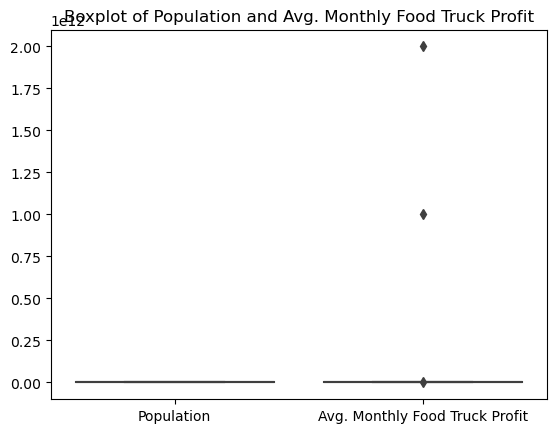

In [3]:
df = pd.read_excel('Food Franchise dataset.xlsx')
df.dropna(inplace=True)
sns.boxplot(data=df[['Population', 'Avg. Monthly Food Truck Profit']])
plt.title('Boxplot of Population and Avg. Monthly Food Truck Profit')
plt.show()

In [4]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_df = df[outliers]
print('Potential Outliers:')
outliers_df

Potential Outliers:


C:\Users\Shrinjita Paul\AppData\Local\Temp\ipykernel_3220\4069008592.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


,City,State,Population,Avg. Monthly Food Truck Profit,Median Income,Population Density (per sq mi)
1,City2,CO,715522,2.200000e+04,78621.0,4823
2,City3,WA,739952,2.850000e+04,89728.0,1831
4,City5,IL,2740598,3.200000e+04,70318.0,5242
9,City10,CA,1386670,2.900000e+04,87128.0,3807
11,City12,CA,1045592,3.150000e+04,102414.0,5183
20,City21,MA,667137,3.300000e+04,89371.0,13688
22,City23,MD,602478,2.200000e+04,71205.0,4867
24,City25,CT,1210858,4.000000e+09,71262.0,1816
25,City26,MN,2238015,2.000000e+12,64262.0,1379
42,City43,OK,2689437,1.000000e+12,76366.0,2801


In [5]:
df_cleaned = df[~outliers]
print('Cleaned Dataset:')
df_cleaned.head()

Cleaned Dataset:


,City,State,Population,Avg. Monthly Food Truck Profit,Median Income,Population Density (per sq mi)
0,City1,TX,2043891,25000.0,72542.0,3157
5,City6,GA,498067,24500.0,65543.0,3482
6,City7,AZ,1660272,21000.0,62431.0,1113
7,City8,TX,2325500,30000.0,77834.0,4396
10,City11,TX,1345878,28000.0,74201.0,4208


In [6]:
df = df_cleaned
df.drop_duplicates(inplace=True)
for col in df.columns:
    unique_values = df[col].unique()
df.loc[df['Avg. Monthly Food Truck Profit'] < 0, 'Avg. Monthly Food Truck Profit'] = 0
print('Updated Dataset:')
df.head(10)

Updated Dataset:


,City,State,Population,Avg. Monthly Food Truck Profit,Median Income,Population Density (per sq mi)
0,City1,TX,2043891,25000.0,72542.0,3157
5,City6,GA,498067,24500.0,65543.0,3482
6,City7,AZ,1660272,21000.0,62431.0,1113
7,City8,TX,2325500,30000.0,77834.0,4396
10,City11,TX,1345878,28000.0,74201.0,4208
12,City13,FL,903889,20500.0,61987.0,1330
13,City14,IN,881008,22500.0,67142.0,2262
14,City15,OH,878333,21000.0,64321.0,2816
15,City16,NC,874579,24000.0,73928.0,2387
16,City17,TX,918915,27500.0,70012.0,3129


In [7]:
summary_stats = df.describe()
summary_stats

,Population,Avg. Monthly Food Truck Profit,Median Income,Population Density (per sq mi)
count,5.600000e+01,56.000000,56.000000,56.000000
mean,2.378951e+06,24931.964286,68995.000000,2322.892857
std,1.391367e+06,4587.968578,4932.445519,730.441104
min,4.980670e+05,15349.000000,55142.000000,1113.000000
25%,1.170744e+06,21000.000000,65331.000000,1671.750000
50%,2.402024e+06,24648.500000,69242.000000,2420.000000
75%,3.045584e+06,27625.000000,72104.000000,2830.500000
max,4.914006e+06,34583.000000,77834.000000,4396.000000


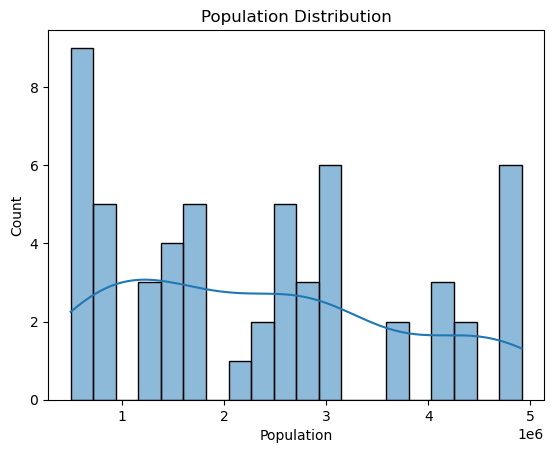

In [8]:
sns.histplot(df['Population'], bins=20, kde=True)
plt.title('Population Distribution')
plt.show()

In [9]:
X = df[['Population']]
y = df['Avg. Monthly Food Truck Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
population_35000 = [[35000]]
predicted_profit = model.predict(population_35000)
print(f'Predicted profit for a city with a population of 35,000: ${predicted_profit[0]}')

Mean Squared Error: 16464684.108040607
R-squared: -0.16178834855219582
Predicted profit for a city with a population of 35,000: $26412.745648112494


c:\Users\Shrinjita Paul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


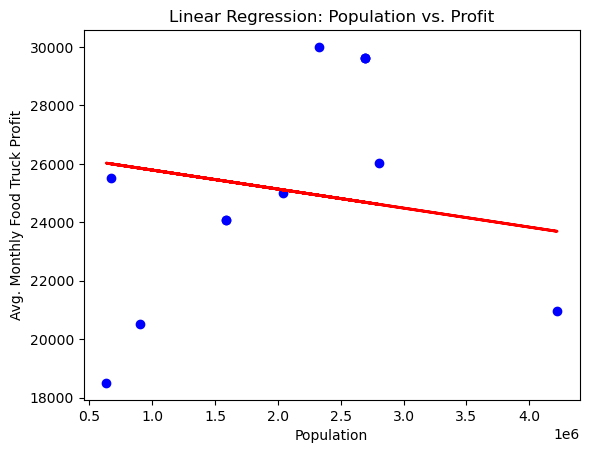

In [11]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Population')
plt.ylabel('Avg. Monthly Food Truck Profit')
plt.title('Linear Regression: Population vs. Profit')
plt.show()

Logistic Regression house price prediction

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset
df = pd.read_excel('House Price Prediction dataset.xlsx')
df.head(5)

,Size (sq ft),Bedrooms,Price (USD)
0,2200,3.0,425000
1,1800,4.0,510000
2,1500,2.0,350000
3,2400,4.0,575000
4,1700,3.0,470000


In [13]:
# Check for missing values and handle them
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
# Data cleaning and preprocessing
# For simplicity, assume that missing values can be filled with the mean value
df.fillna(df.mean(), inplace=True)
# Check data types and convert if necessary
print("Data Types:\n", df.dtypes)

Missing Values:
 Size (sq ft)    0
Bedrooms        1
Price (USD)     0
dtype: int64
Data Types:
 Size (sq ft)      int64
Bedrooms        float64
Price (USD)       int64
dtype: object


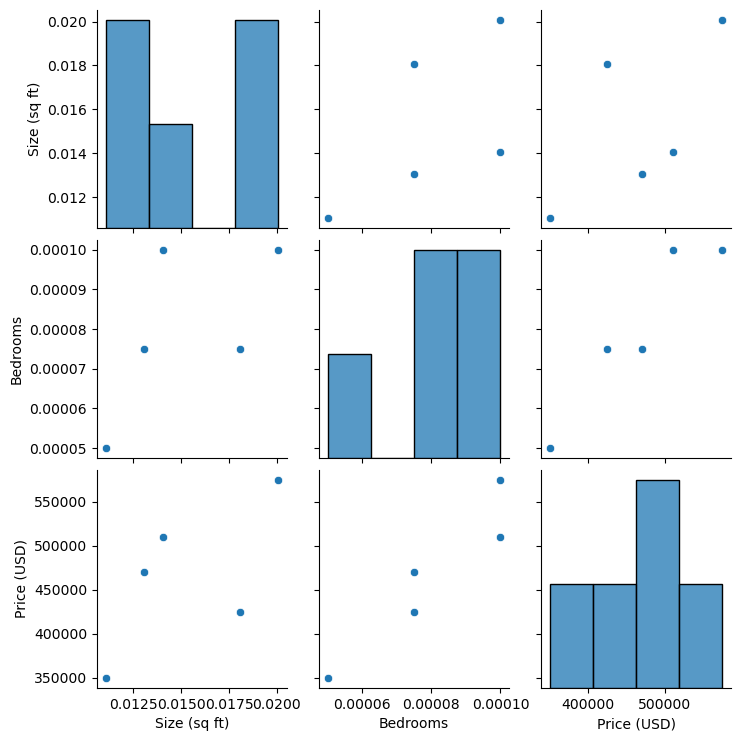

In [14]:
# Scaling or normalization if required (example using Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Size (sq ft)', 'Bedrooms']])
df[['Size (sq ft)', 'Bedrooms']] = scaled_features
# Exploratory Data Analysis
# Display pairplot to visualize relationships between variables
sns.pairplot(df.head())
plt.show()

In [15]:
# Check for outliers and treat them (example using winsorization)
from scipy.stats import mstats
df['Price (USD)'] = mstats.winsorize(df['Price (USD)'], limits=[0.05, 0.05])
# Check for duplicates and remove if any
df.drop_duplicates(inplace=True)
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
summary_stats

Summary Statistics:


,Size (sq ft),Bedrooms,Price (USD)
count,48.000000,48.000000,48.000000
mean,0.034157,0.022856,417187.500000
std,0.142525,0.144282,174578.234154
min,0.000000,0.000000,120000.000000
25%,0.008785,0.000050,287500.000000
50%,0.014056,0.000075,422500.000000
75%,0.019076,0.000100,550000.000000
max,1.000000,1.000000,725000.000000


In [16]:
# Correlation analysis
correlation = df.corr()
print("Correlation Matrix:")
correlation

Correlation Matrix:


,Size (sq ft),Bedrooms,Price (USD)
Size (sq ft),1.000000,-0.016949,-0.055665
Bedrooms,-0.016949,1.000000,0.136558
Price (USD),-0.055665,0.136558,1.000000


Mean Squared Error: 97865000000.0
R-squared: -2.0271582789446008


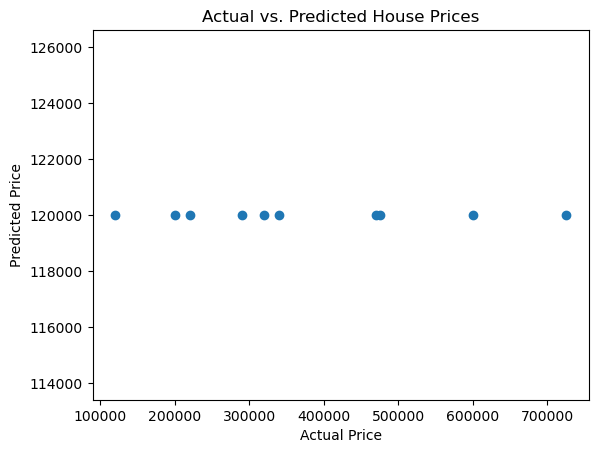

In [17]:
# Linear Regression Model
X = df[['Size (sq ft)', 'Bedrooms']]
y = df['Price (USD)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
# Visualize actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.show()

Implement a K-means clustering algorithm on synthetic dataset

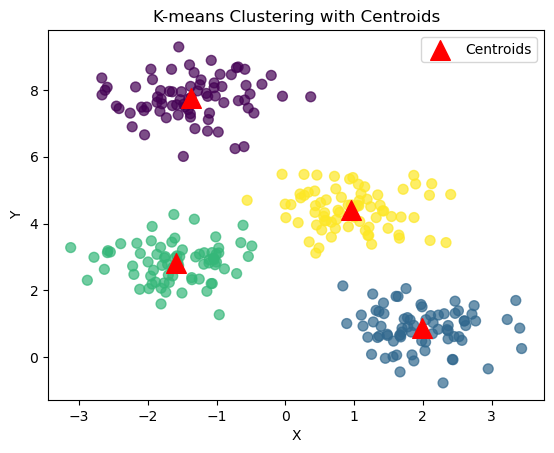

Inertia: [[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]] 

 Silhouette Score: 0.6819938690643478


In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import numpy as np

class KMeansClustering:
    def __init__(self, n_clusters, max_iterations=300):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.labels_ = None  # Initialize labels attribute

    def fit(self, X):
        # Step 2: Initialize Random Centroids
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        self.labels_ = None  # Reset labels before fitting

        for _ in range(self.max_iterations):
            # Step 3: Assign Data Points to Closest Centroid
            distances = np.sqrt(((X - self.centroids[:, np.newaxis]) ** 2).sum(axis=2))
            self.labels_ = np.argmin(distances, axis=0)

            # Step 4: Update Centroids
            new_centroids = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])

            # Step 6: Convergence Check
            if np.allclose(new_centroids, self.centroids):
                break

            self.centroids = new_centroids

        return self

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Initialize and fit K-means clustering
kmeans = KMeansClustering(n_clusters=4)
kmeans.fit(X)

# Plot clustered data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='^', c='red', s=200, label='Centroids')
plt.legend()
plt.title('K-means Clustering with Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Calculate Silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)  # Use kmeans.labels_ instead of kmeans.labels


# Calculate inertia
inertia = kmeans.centroids
print(f"Inertia: {inertia} \n\n Silhouette Score: {silhouette_avg}")


Single Layer Perceptron

In [19]:
import numpy as np

class SingleLayerPerceptron:
    def __init__(self, input_size):
        self.weights = np.zeros(input_size + 1)  # +1 for the bias term
        self.learning_rate = 0.1

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # weighted sum + bias
        return self.activation_function(summation)

    def train(self, training_inputs, labels, epochs):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs  # update weights
                self.weights[0] += self.learning_rate * error  # update bias term

# Sample dataset
training_data = np.array([
    [2, 30],
    [3, 40],
    [5, 60],
    [1, 20],
    [4, 50],
    [6, 70]
])
labels = np.array([0, 0, 1, 0, 1, 1])

# Create and train the perceptron
perceptron = SingleLayerPerceptron(input_size=2)
perceptron.train(training_data, labels, epochs=1000)

# Test the perceptron
test_inputs = np.array([[3, 35], [6, 65]])
for test_input in test_inputs:
    prediction = perceptron.predict(test_input)
    print(f"Input: {test_input}, Predicted Result: {'Pass' if prediction == 1 else 'Fail'}")


Input: [ 3 35], Predicted Result: Fail
Input: [ 6 65], Predicted Result: Pass


Multiple Layer Perceptron

In [20]:
%pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the MLP architecture
input_layer = layers.Input(shape=(784,))
hidden_layer_1 = layers.Dense(256, activation='relu')(input_layer)
hidden_layer_2 = layers.Dense(128, activation='relu')(hidden_layer_1)
output_layer = layers.Dense(10, activation='softmax')(hidden_layer_2)

# Define the model
model = models.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

# Flatten the input images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Train the model
model.fit(x_train_flat, y_train, epochs=10, validation_data=(x_test_flat, y_test))

# Make predictions
predictions = model.predict(x_test_flat)

ModuleNotFoundError: No module named 'tensorflow'

Backpropagation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases
input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.1

weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

# Training the network using backpropagation
losses = []
epochs = 10000
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

    # Calculate loss
    loss = np.mean((y - predicted_output) ** 2)
    losses.append(loss)

    # Backpropagation
    output_error = y - predicted_output
    output_delta = output_error * sigmoid_derivative(predicted_output)

    hidden_layer_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

    # Update weights
    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate

# Plotting the decision boundary
x_vals = np.linspace(-0.5, 1.5, 100)
y_vals = np.linspace(-0.5, 1.5, 100)
X_mesh, Y_mesh = np.meshgrid(x_vals, y_vals)
Z_mesh = np.zeros(X_mesh.shape)

for i in range(X_mesh.shape[0]):
    for j in range(X_mesh.shape[1]):
        input_data = np.array([[X_mesh[i, j], Y_mesh[i, j]]])
        hidden_output = sigmoid(np.dot(input_data, weights_input_hidden))
        output = sigmoid(np.dot(hidden_output, weights_hidden_output))
        Z_mesh[i, j] = output[0][0]

plt.contourf(X_mesh, Y_mesh, Z_mesh, cmap='RdYlBu')
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='RdYlBu', edgecolors='k')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('Decision Boundary for XOR Function')
plt.colorbar()
plt.show()